In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel('C:/Users/asus/Desktop/crm_data_retail.xlsx')

In [2]:
df.head()

,ID,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,114,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
1,115,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311.0,United Kingdom
2,116,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311.0,United Kingdom
3,119,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311.0,United Kingdom
4,121,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom


In [3]:
df.shape

(531283, 9)

In [4]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,531283.0,271255.552028,1.0,135570.5,271427.0,407074.5,541910.0,156563.907547
Invoice,531283.0,559971.926875,536365.0,547903.0,560693.0,571846.0,581587.0,13430.761822
Quantity,531283.0,10.655299,1.0,1.0,3.0,10.0,80995.0,156.830617
InvoiceDate,531283,2011-07-04 18:15:52.516756224,2010-12-01 08:26:00,2011-03-28 11:59:00,2011-07-20 12:01:00,2011-10-19 12:35:00,2011-12-09 12:50:00,NaN
Price,531283.0,3.878166,0.0,1.25,2.08,4.13,13541.33,32.510638
Customer ID,397925.0,15294.308601,12346.0,13969.0,15159.0,16795.0,18287.0,1713.172738


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull()

,ID,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
531278,False,False,False,False,False,False,False,False,False
531279,False,False,False,True,False,False,False,True,False
531280,False,False,False,False,False,False,False,False,False
531281,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

ID                  0
Invoice             0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
Price               0
Customer ID    133358
Country             0
dtype: int64

In [8]:
df.columns

Index(['ID', 'Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
df_grouped=df.groupby('Invoice').agg({'ID':'count'})

In [10]:
sepetsayısı=df['Invoice'].nunique()

In [11]:
sepettekiortürünsayısı=df_grouped.median()

In [12]:
df_grouped2=df.groupby('Description').agg({'ID': 'count'}).sort_values(by='ID', ascending=False)
print(df_grouped2)

                                      ID
Description                             
WHITE HANGING HEART T-LIGHT HOLDER  2327
JUMBO BAG RED RETROSPOT             2115
REGENCY CAKESTAND 3 TIER            2019
PARTY BUNTING                       1707
LUNCH BAG RED RETROSPOT             1594
...                                  ...
PINK FEATHER CHRISTMAS DECORATION      1
PINK DOLLY HAIR CLIPS                  1
WHITE DOVE HONEYCOMB PAPER GARLAND     1
GARLAND, MAGIC GARDEN 1.8M             1
wrongly sold (22719) barcode           1

[4076 rows x 1 columns]


In [13]:
sepetteki_yüzdelik_dilimi = (df_grouped2 / sepetsayısı) * 100
sepetteki_yüzdelik_dilimi=sepetteki_yüzdelik_dilimi.applymap(lambda x: f"{x:.2f}%")
sepetteki_yüzdelik_dilimi.head(20)

C:\Users\asus\AppData\Local\Temp\ipykernel_23740\2421011385.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sepetteki_yüzdelik_dilimi=sepetteki_yüzdelik_dilimi.applymap(lambda x: f"{x:.2f}%")


,ID
Description,
WHITE HANGING HEART T-LIGHT HOLDER,11.23%
JUMBO BAG RED RETROSPOT,10.21%
REGENCY CAKESTAND 3 TIER,9.74%
PARTY BUNTING,8.24%
LUNCH BAG RED RETROSPOT,7.69%
ASSORTED COLOUR BIRD ORNAMENT,7.18%
SET OF 3 CAKE TINS PANTRY DESIGN,6.75%
PACK OF 72 RETROSPOT CAKE CASES,6.61%
LUNCH BAG BLACK SKULL.,6.41%


In [14]:
# Hedef ürün adı
hedef_ürün = "JAM MAKING SET WITH JARS" 

# DataFrame'i filtreleme: 'Description' kolonunda hedef ürünü içeren satırları seçme
filtered_df = df[df['Description'].str.contains(hedef_ürün, case=False, na=False)]

# Sepet numaralarını görmek için 'Invoice' kolonunu seçme
hedef_sepetler = filtered_df['Invoice'].unique()

# Sepet numaralarını yazdırma
print(hedef_sepetler)
print(len(hedef_sepetler))

[536464 536528 536863 ... 579271 561901 563590]
1133


In [15]:
df['hedef_sepet'] = df['Invoice'].apply(lambda x: 'target' if x in hedef_sepetler else '')

print(df[['Invoice', 'hedef_sepet']])

        Invoice hedef_sepet
0        536381            
1        536381            
2        536381            
3        536381            
4        536381            
...         ...         ...
531278   573008      target
531279   542504            
531280   578841            
531281   541431            
531282   581483            

[531283 rows x 2 columns]


In [16]:
df_copy = df[df['hedef_sepet'] == 'target']


print(df_copy)

            ID  Invoice StockCode                        Description  \
13         169   536385     22783   SET 3 WICKER OVAL BASKETS W LIDS   
132        786   536464    90059C  DIAMANTE HAIR GRIP PACK/2 MONTANA   
133        787   536464    90200C           BLUE SWEETHEART BRACELET   
134        789   536464    90200A         PURPLE SWEETHEART BRACELET   
135        790   536464     22386            JUMBO BAG PINK POLKADOT   
...        ...      ...       ...                                ...   
531036  304654   563590     22969       HOMEMADE JAM SCENTED CANDLES   
531117  111528   545748     22492            MINI PAINT SET VINTAGE    
531231  534953   581175     23084                 RABBIT NIGHT LIGHT   
531236  223447   556484     22920                  HERB MARKER BASIL   
531278  421633   573008     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS   

        Quantity         InvoiceDate  Price  Customer ID         Country  \
13             1 2010-12-01 09:56:00  19.95      17420.0  U

In [17]:
pivot_df = pd.pivot_table(df_copy, index='Description', aggfunc='size').reset_index(name='count')
pivot_df = pivot_df.sort_values(by='count', ascending=False)  
print(pivot_df)#jam making set with jars içeren sepetler.


                             Description  count
1508            JAM MAKING SET WITH JARS   1142
1507              JAM MAKING SET PRINTED    476
2696   SET OF 3 CAKE TINS PANTRY DESIGN     382
2346     RECIPE BOX PANTRY YELLOW DESIGN    339
2743        SET OF 4 PANTRY JELLY MOULDS    318
...                                  ...    ...
2185     PINK HANGING GINGHAM EASTER HEN      1
3312        WHITE BIRD GARDEN DESIGN MUG      1
675           CHRYSANTHEMUM POCKET BOOK       1
3314  WHITE CANDYSTUFT ARTIFICIAL FLOWER      1
2586  SET 10 CARD CHRISTMAS STAMPS 16963      1

[3478 rows x 2 columns]


In [18]:
#apriori analizi

merged_df = pd.merge(pivot_df, sepetteki_yüzdelik_dilimi , on='Description', how='left')
merged_df = merged_df.rename(columns={'ID': 'support'})


print(merged_df)


                             Description  count support
0               JAM MAKING SET WITH JARS   1142   5.51%
1                 JAM MAKING SET PRINTED    476   5.64%
2      SET OF 3 CAKE TINS PANTRY DESIGN     382   6.75%
3        RECIPE BOX PANTRY YELLOW DESIGN    339   5.47%
4           SET OF 4 PANTRY JELLY MOULDS    318   5.32%
...                                  ...    ...     ...
3473     PINK HANGING GINGHAM EASTER HEN      1   0.02%
3474        WHITE BIRD GARDEN DESIGN MUG      1   0.01%
3475          CHRYSANTHEMUM POCKET BOOK       1   0.10%
3476  WHITE CANDYSTUFT ARTIFICIAL FLOWER      1   0.10%
3477  SET 10 CARD CHRISTMAS STAMPS 16963      1   0.00%

[3478 rows x 3 columns]


In [19]:
merged_df['confidence'] = (merged_df['count'] / 1142) * 100


print(merged_df)


                             Description  count support  confidence
0               JAM MAKING SET WITH JARS   1142   5.51%  100.000000
1                 JAM MAKING SET PRINTED    476   5.64%   41.681261
2      SET OF 3 CAKE TINS PANTRY DESIGN     382   6.75%   33.450088
3        RECIPE BOX PANTRY YELLOW DESIGN    339   5.47%   29.684764
4           SET OF 4 PANTRY JELLY MOULDS    318   5.32%   27.845884
...                                  ...    ...     ...         ...
3473     PINK HANGING GINGHAM EASTER HEN      1   0.02%    0.087566
3474        WHITE BIRD GARDEN DESIGN MUG      1   0.01%    0.087566
3475          CHRYSANTHEMUM POCKET BOOK       1   0.10%    0.087566
3476  WHITE CANDYSTUFT ARTIFICIAL FLOWER      1   0.10%    0.087566
3477  SET 10 CARD CHRISTMAS STAMPS 16963      1   0.00%    0.087566

[3478 rows x 4 columns]


In [20]:
print(merged_df['support'].dtype)

object


In [21]:

merged_df['support'] = merged_df['support'].str.replace('%', '').astype(float)


merged_df['support'] = merged_df['support'] / 100


merged_df['Lift'] = merged_df['confidence'] / merged_df['support']


print(merged_df)

                             Description  count  support  confidence  \
0               JAM MAKING SET WITH JARS   1142   0.0551  100.000000   
1                 JAM MAKING SET PRINTED    476   0.0564   41.681261   
2      SET OF 3 CAKE TINS PANTRY DESIGN     382   0.0675   33.450088   
3        RECIPE BOX PANTRY YELLOW DESIGN    339   0.0547   29.684764   
4           SET OF 4 PANTRY JELLY MOULDS    318   0.0532   27.845884   
...                                  ...    ...      ...         ...   
3473     PINK HANGING GINGHAM EASTER HEN      1   0.0002    0.087566   
3474        WHITE BIRD GARDEN DESIGN MUG      1   0.0001    0.087566   
3475          CHRYSANTHEMUM POCKET BOOK       1   0.0010    0.087566   
3476  WHITE CANDYSTUFT ARTIFICIAL FLOWER      1   0.0010    0.087566   
3477  SET 10 CARD CHRISTMAS STAMPS 16963      1   0.0000    0.087566   

             Lift  
0     1814.882033  
1      739.029449  
2      495.556853  
3      542.683063  
4      523.418880  
...           .

####MÜŞTERİ ANALİZİ

In [22]:

df_copy.loc[:, 'Amount'] = df_copy.loc[:, 'Price'] * df_copy.loc[:, 'Quantity']

print(df_copy)

            ID  Invoice StockCode                        Description  \
13         169   536385     22783   SET 3 WICKER OVAL BASKETS W LIDS   
132        786   536464    90059C  DIAMANTE HAIR GRIP PACK/2 MONTANA   
133        787   536464    90200C           BLUE SWEETHEART BRACELET   
134        789   536464    90200A         PURPLE SWEETHEART BRACELET   
135        790   536464     22386            JUMBO BAG PINK POLKADOT   
...        ...      ...       ...                                ...   
531036  304654   563590     22969       HOMEMADE JAM SCENTED CANDLES   
531117  111528   545748     22492            MINI PAINT SET VINTAGE    
531231  534953   581175     23084                 RABBIT NIGHT LIGHT   
531236  223447   556484     22920                  HERB MARKER BASIL   
531278  421633   573008     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS   

        Quantity         InvoiceDate  Price  Customer ID         Country  \
13             1 2010-12-01 09:56:00  19.95      17420.0  U

C:\Users\asus\AppData\Local\Temp\ipykernel_23740\3415924088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:, 'Amount'] = df_copy.loc[:, 'Price'] * df_copy.loc[:, 'Quantity']


In [23]:
#Today date 01.01.2012

In [24]:
reference_date = pd.to_datetime('2012-01-01')
df_copy['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_copy['DaysDifference'] = (reference_date - df_copy['InvoiceDate']).dt.days
print(df_copy[['InvoiceDate', 'DaysDifference']])

               InvoiceDate  DaysDifference
13     2010-12-01 09:56:00             395
132    2010-12-01 12:23:00             395
133    2010-12-01 12:23:00             395
134    2010-12-01 12:23:00             395
135    2010-12-01 12:23:00             395
...                    ...             ...
531036 2011-08-17 20:02:00             136
531117 2011-03-07 11:52:00             299
531231 2011-12-07 15:16:00              24
531236 2011-06-12 13:17:00             202
531278 2011-10-27 12:26:00              65

[106027 rows x 2 columns]


C:\Users\asus\AppData\Local\Temp\ipykernel_23740\2295613882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\asus\AppData\Local\Temp\ipykernel_23740\2295613882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['DaysDifference'] = (reference_date - df_copy['InvoiceDate']).dt.days


In [27]:

df_copy.loc[:, 'Amount'] = df_copy.loc[:, 'Price'] * df_copy.loc[:, 'Quantity']
df_copy['Amount'].head()

13     19.95
132     1.65
133     4.25
134     4.25
135     1.95
Name: Amount, dtype: float64

In [33]:

df_copy.loc[:, 'monetary'] = df_copy.groupby('Customer ID')['Amount'].transform('sum')


print(df_copy.head())



            ID  Invoice StockCode                     Description  Quantity  \
379715  116004   546172     21929  JUMBO BAG PINK VINTAGE PAISLEY        10   
166101  115996   546172     22625              RED KITCHEN SCALES         2   
528067  326182   565475     21787           RAIN PONCHO RETROSPOT       144   
521434  326135   565475     47566                   PARTY BUNTING        72   
521200  269345   560445     47566                   PARTY BUNTING        72   

               InvoiceDate  Price  Customer ID Country hedef_sepet  Amount  \
379715 2011-03-10 10:32:00   1.95      14156.0    EIRE      target    19.5   
166101 2011-03-10 10:32:00   8.50      14156.0    EIRE      target    17.0   
528067 2011-09-05 10:47:00   0.65      14156.0    EIRE      target    93.6   
521434 2011-09-05 10:47:00   4.15      14156.0    EIRE      target   298.8   
521200 2011-07-19 09:08:00   4.15      14156.0    EIRE      target   298.8   

        DaysDifference  monetary  
379715             29

In [54]:

df_unique_invoices = df_copy.drop_duplicates(subset=['Customer ID', 'Invoice'])

df_frequency = df_unique_invoices.groupby('Customer ID').agg({'Invoice': 'count'}).reset_index()

df_frequency.columns = ['Customer ID', 'Frequency']

if 'Frequency' in df_copy.columns:
    df_copy = df_copy.drop(columns=['Frequency'])

df_copy = df_copy.merge(df_frequency, on='Customer ID', how='left')

print(df_copy.head())



       ID  Invoice StockCode                     Description  Quantity  \
0  116004   546172     21929  JUMBO BAG PINK VINTAGE PAISLEY        10   
1  115996   546172     22625              RED KITCHEN SCALES         2   
2  326182   565475     21787           RAIN PONCHO RETROSPOT       144   
3  326135   565475     47566                   PARTY BUNTING        72   
4  269345   560445     47566                   PARTY BUNTING        72   

          InvoiceDate  Price  Customer ID Country hedef_sepet  Amount  \
0 2011-03-10 10:32:00   1.95      14156.0    EIRE      target    19.5   
1 2011-03-10 10:32:00   8.50      14156.0    EIRE      target    17.0   
2 2011-09-05 10:47:00   0.65      14156.0    EIRE      target    93.6   
3 2011-09-05 10:47:00   4.15      14156.0    EIRE      target   298.8   
4 2011-07-19 09:08:00   4.15      14156.0    EIRE      target   298.8   

   DaysDifference  monetary  Frequency_x  Frequency_y  Frequency  
0             296  55526.28          8.0         

In [56]:

df_recency = df_copy.groupby('Customer ID')['DaysDifference'].min().reset_index()
df_recency.columns = ['Customer ID', 'Recency']

df_tenure = df_copy.groupby('Customer ID')['DaysDifference'].max().reset_index()
df_tenure.columns = ['Customer ID', 'Tenure']

df_copy = df_copy.merge(df_recency, on='Customer ID', how='left')
df_copy = df_copy.merge(df_tenure, on='Customer ID', how='left')

print(df_copy.head())



       ID  Invoice StockCode                     Description  Quantity  \
0  116004   546172     21929  JUMBO BAG PINK VINTAGE PAISLEY        10   
1  115996   546172     22625              RED KITCHEN SCALES         2   
2  326182   565475     21787           RAIN PONCHO RETROSPOT       144   
3  326135   565475     47566                   PARTY BUNTING        72   
4  269345   560445     47566                   PARTY BUNTING        72   

          InvoiceDate  Price  Customer ID Country hedef_sepet  Amount  \
0 2011-03-10 10:32:00   1.95      14156.0    EIRE      target    19.5   
1 2011-03-10 10:32:00   8.50      14156.0    EIRE      target    17.0   
2 2011-09-05 10:47:00   0.65      14156.0    EIRE      target    93.6   
3 2011-09-05 10:47:00   4.15      14156.0    EIRE      target   298.8   
4 2011-07-19 09:08:00   4.15      14156.0    EIRE      target   298.8   

   DaysDifference  monetary  Frequency_x  Frequency_y  Frequency  Recency  \
0             296  55526.28          8.

In [57]:
basketsize = df_copy[['Customer ID', 'Recency', 'Frequency', 'monetary']]

print(basketsize.head())


   Customer ID  Recency  Frequency  monetary
0      14156.0     45.0        8.0  55526.28
1      14156.0     45.0        8.0  55526.28
2      14156.0     45.0        8.0  55526.28
3      14156.0     45.0        8.0  55526.28
4      14156.0     45.0        8.0  55526.28


In [60]:
basketsize.loc[:, 'Basket_Size'] = basketsize['monetary'] / basketsize['Frequency']

print(basketsize.head())


   Customer ID  Recency  Frequency  monetary  Basket_Size
0      14156.0     45.0        8.0  55526.28     6940.785
1      14156.0     45.0        8.0  55526.28     6940.785
2      14156.0     45.0        8.0  55526.28     6940.785
3      14156.0     45.0        8.0  55526.28     6940.785
4      14156.0     45.0        8.0  55526.28     6940.785


In [83]:
basketsize = basketsize.drop_duplicates(subset=['Customer ID'])
print(basketsize.head())



      Customer ID  Recency  Frequency  monetary   Basket_Size R_Score
0         14156.0     45.0        8.0  55526.28   6940.785000       5
282       14096.0     26.0       10.0  54798.10   5479.810000       5
4330      14646.0     24.0        8.0  54044.05   6755.506250       5
4812      12415.0    199.0        3.0  53525.69  17841.896667       3
5101      14088.0     38.0        4.0  27832.09   6958.022500       5
      Customer ID  Recency  Frequency  monetary   Basket_Size R_Score
0         14156.0     45.0        8.0  55526.28   6940.785000       5
282       14096.0     26.0       10.0  54798.10   5479.810000       5
4330      14646.0     24.0        8.0  54044.05   6755.506250       5
4812      12415.0    199.0        3.0  53525.69  17841.896667       3
5101      14088.0     38.0        4.0  27832.09   6958.022500       5


In [84]:
basketsize= basketsize.sort_values(by='Frequency', ascending=False)

print(basketsize.head())

      Customer ID  Recency  Frequency  monetary  Basket_Size R_Score
5647      14911.0     23.0       22.0  22034.24  1001.556364       5
282       14096.0     26.0       10.0  54798.10  5479.810000       5
8577      13319.0     51.0        9.0   5640.72   626.746667       5
0         14156.0     45.0        8.0  55526.28  6940.785000       5
4330      14646.0     24.0        8.0  54044.05  6755.506250       5


In [93]:
basketsize['F_Score'] = pd.cut(basketsize["Frequency"],
                              bins=[0,3,5,7,9,25], 
                              labels=[1, 2, 3, 4, 5],      
                              right=False)  

print(basketsize[['Customer ID', 'Frequency', 'F_Score']].head())



      Customer ID  Frequency F_Score
5647      14911.0       22.0       5
282       14096.0       10.0       5
8577      13319.0        9.0       5
0         14156.0        8.0       4
4330      14646.0        8.0       4


In [97]:
RF_SEGMENT=basketsize[['Customer ID', 'R_Score', 'F_Score']]
print(RF_SEGMENT.head())


      Customer ID R_Score F_Score
5647      14911.0       5       5
282       14096.0       5       5
8577      13319.0       5       5
0         14156.0       5       4
4330      14646.0       5       4


In [98]:

RF_SEGMENT.loc[:, 'RF_Score'] = basketsize['R_Score'].astype(str) + basketsize['F_Score'].astype(str)

# Sonuçları görelim
print(RF_SEGMENT[['Customer ID', 'R_Score', 'F_Score', 'RF_Score']].head())




      Customer ID R_Score F_Score RF_Score
5647      14911.0       5       5       55
282       14096.0       5       5       55
8577      13319.0       5       5       55
0         14156.0       5       4       54
4330      14646.0       5       4       54


C:\Users\asus\AppData\Local\Temp\ipykernel_23740\2280926045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RF_SEGMENT.loc[:, 'RF_Score'] = basketsize['R_Score'].astype(str) + basketsize['F_Score'].astype(str)


In [104]:

def Segment_name(row):
    r = row['R_Score']
    f = row['F_Score']
    
    if r == 5 and f == 5:
        return 'champions'
    elif r == 5 and f == 4:
        return 'champions'
    elif r == 5 and f == 3:
        return 'potential loyalists'
    elif r == 5 and f == 2:
        return 'potential loyalists'
    elif r == 5 and f == 1:
        return 'about to sleep'      
    elif r == 3 and f == 5:
        return 'loyal customers'
    elif r == 4 and f == 4:
        return 'loyal customers'
    elif r == 3 and f == 4:
        return 'loyal customers'
    elif r == 4 and f == 3:
        return 'potential loyalists'
    elif r == 4 and f == 1:
        return 'promissing'
    elif r == 4 and f == 2:
        return 'potential loyalists'    
    elif r == 5 and f == 2:
        return 'promissing'    
    elif r == 2 and f == 3:
        return 'at risk'
    elif r == 2 and f == 4:
        return 'at risk'    
    elif r == 1 and f == 5:
        return 'can’t loose them'
    elif r == 1 and f == 1:
        return 'hibernating'
    elif r == 5 and f == 1:
        return 'new customers'
    elif r == 3 and f == 3:
        return 'need attention'
    elif r == 3 and f == 2:
        return 'about to sleep'
    elif r == 2 and f == 5:
        return 'cant loose them'    
    else:
        return 'other'


RF_SEGMENT.loc[:, 'Segment_name'] = RF_SEGMENT.apply(Segment_name, axis=1)


print(RF_SEGMENT[['Customer ID', 'R_Score', 'F_Score', 'Segment_name']].head())




      Customer ID R_Score F_Score Segment_name
5647      14911.0       5       5    champions
282       14096.0       5       5    champions
8577      13319.0       5       5    champions
0         14156.0       5       4    champions
4330      14646.0       5       4    champions


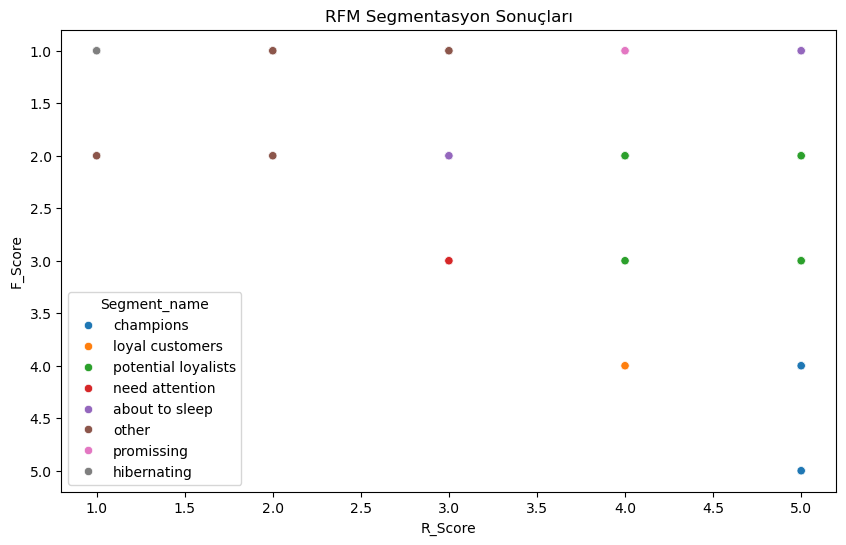

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=RF_SEGMENT, x='R_Score', y='F_Score', hue='Segment_name', palette='tab10')
plt.title('RFM Segmentasyon Sonuçları')
plt.show()


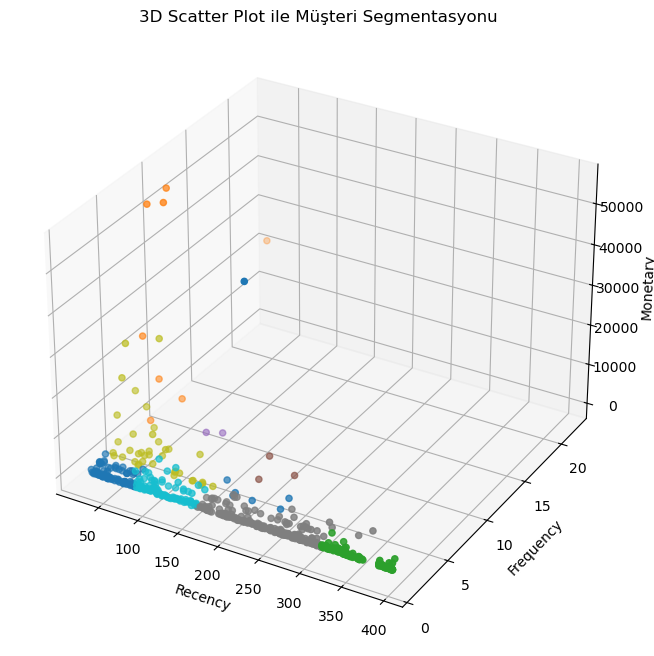

In [108]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(basketsize['Recency'], basketsize['Frequency'], basketsize['monetary'], c=RF_SEGMENT['Segment_name'].astype('category').cat.codes, cmap='tab10')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('3D Scatter Plot ile Müşteri Segmentasyonu')
plt.show()
